# Proyek Akhir: Menyelesaikan Permasalahan Jaya Jaya Institut

- Nama: Achmad Fauzihan Bagus Sajiwo
- Email: achmadfauzihanbagussajiwo@gmail.com
- Id Dicoding: A296YBF008

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from joblib import dump
import joblib
import warnings

Mengimpor library yang diperlukan untuk proyek ini. Library seperti alat bantu yang berisi fungsi-fungsi siap pakai agar nanti tidak perlu menulis kode dari awal

In [ ]:
warnings.filterwarnings("ignore")

Menyembunyikan semua pesan peringatan (warning) yang mungkin muncul saat program dijalankan

In [ ]:
pd.set_option('display.max_columns', None)

Memastikan semua kolom pada DataFrame ditampilkan saat dicetak.

### Menyiapkan data yang akan diguankan

In [ ]:
df = pd.read_csv('student_performance.csv')

Membaca data dari file CSV bernama student_performance.csv dan menyimpannya dalam sebuah DataFrame bernama df

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Menampilkan 5 baris pertama dari data yang telah dibaca dan disimpan dalam variabel df

## Data Understanding

In [ ]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


Mengecek dan menghitung jumlah data yang kosong (missing values) pada setiap kolom di DataFrame df. Tidak ada jumlah data yang kosong (missing values) di DataFrame df.

In [ ]:
df.duplicated().sum()

np.int64(0)

Menghitung jumlah baris duplikat dalam DataFrame yang bernama df. Tidak ada data duplikat di DataFrame df.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Menampilkan informasi ringkas tentang DataFrame df. Total data yang ada adalah 4424 dengan 37 kolom (fitur).

In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Menampilkan statistik deskriptif dari data yang ada di dalam DataFrame df.

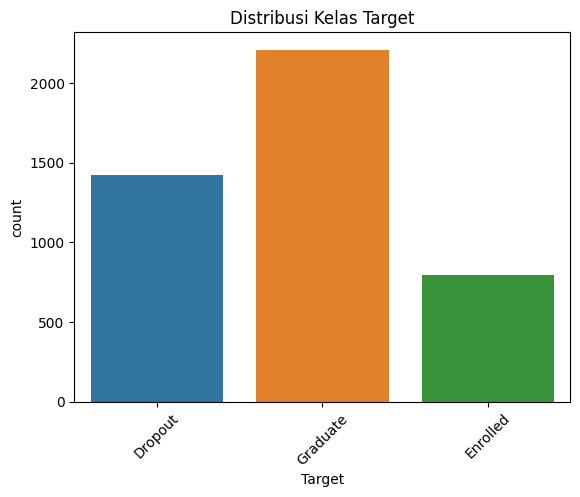

In [ ]:
sns.countplot(data=df, x='Target', hue='Target')
plt.title('Distribusi Kelas Target')
plt.xticks(rotation=45)
plt.show()

Plot di atas menjelaskan tentang penyebaran data kolom 'Target'. Graduate menjadi jumlah kelas terbanyak dibandingkan dengan Dropout dan Enrolled.

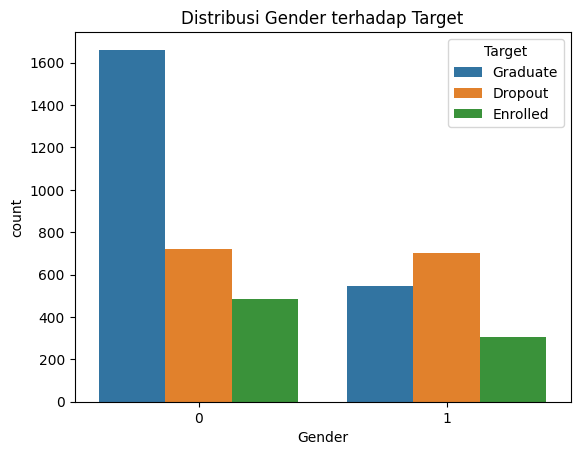

In [ ]:
sns.countplot(data=df, x='Gender', hue='Target')
plt.title('Distribusi Gender terhadap Target')
plt.xticks(rotation=0)
plt.show()

Plot di atas menjelaskan tentang distribusi Gender terhadap Target. Kategori 1 = Male, 0 = Female. Tingkat dropout antara Male dan Female bisa dibilang sama, yaitu sekitar 700 data.

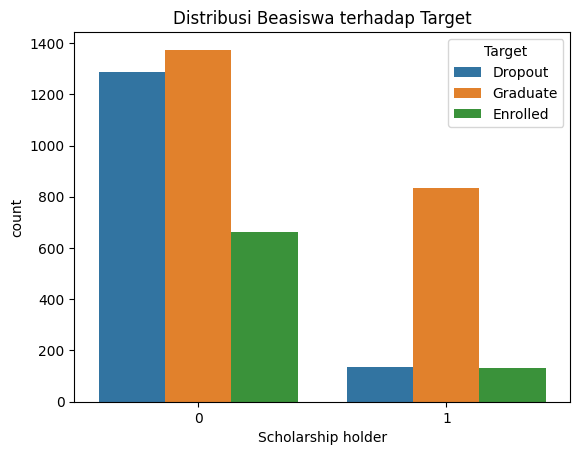

In [ ]:
sns.countplot(data=df, x='Scholarship holder', hue='Target')
plt.title('Distribusi Beasiswa terhadap Target')
plt.show()

Plot di atas menjelaskan tentang distribusi Beasiswa terhadap Target. Kategori 1 = Yes, 0 = No. Tingkat dropout siswa yang tidak mendapatkan beasiswa lebih tinggi daripada yang mendapatkan beasiswa, yaitu sekitar 1300 data.

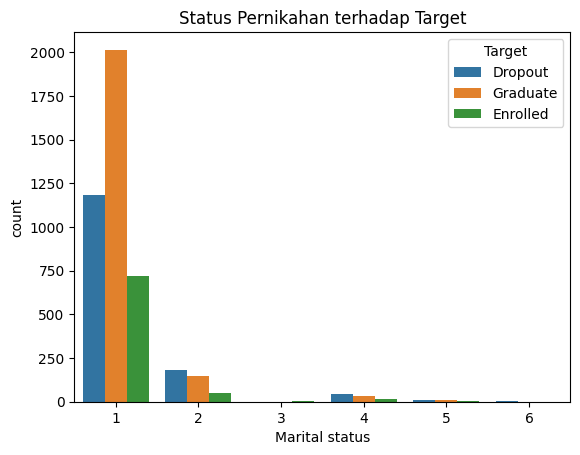

In [ ]:
sns.countplot(data=df, x='Marital status', hue='Target')
plt.title('Status Pernikahan terhadap Target')
plt.show()

Plot di atas menjelaskan tentang distribusi Status Pernikahan terhadap Target. Kategori 1 = single, 2 = married, 3 = widower, 4 = divorced, 5 = facto union, 6 = legally separated. Status 'Single' memiliki tingkat dropout sangat tinggi dibandingkan dengan status pernihakan lainnya, yaitu sekitas 1200 data.

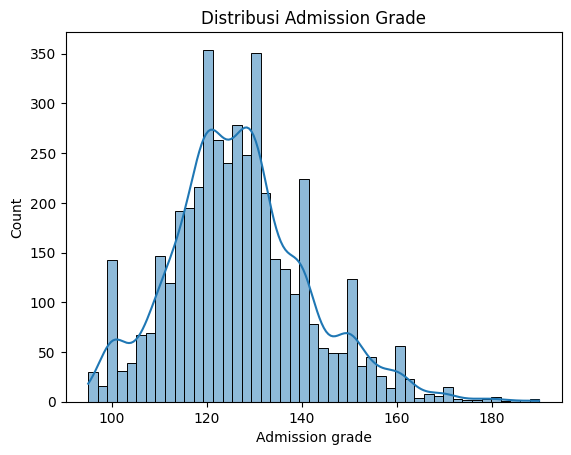

In [ ]:
sns.histplot(data=df, x='Admission grade', kde=True)
plt.title('Distribusi Admission Grade')
plt.show()

Plot di atas menjelaskan tentang distribusi Admission Grade. Nilai 120 dan 130 merupakan nilai dengan jumlah terbanyak, yaitu sekitar 340 data.

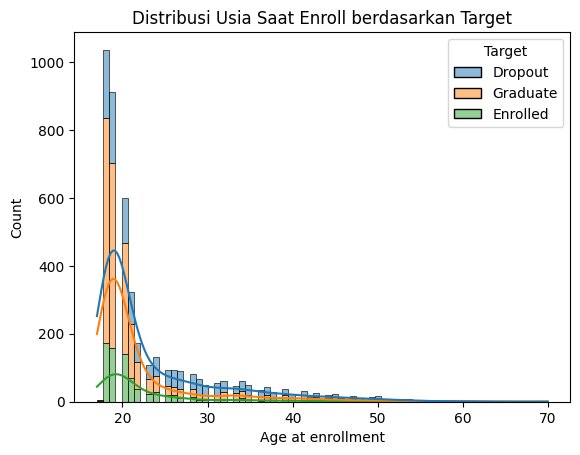

In [ ]:
sns.histplot(data=df, x='Age at enrollment', hue='Target', multiple='stack', kde=True)
plt.title('Distribusi Usia Saat Enroll berdasarkan Target')
plt.show()

Plot di atas menjelaskan tentang distribusi Usia terhadap Target. Usia 20an menjadi usia dengan tingkat dropout tertinggi, sekitar lebih dari 1000 data.

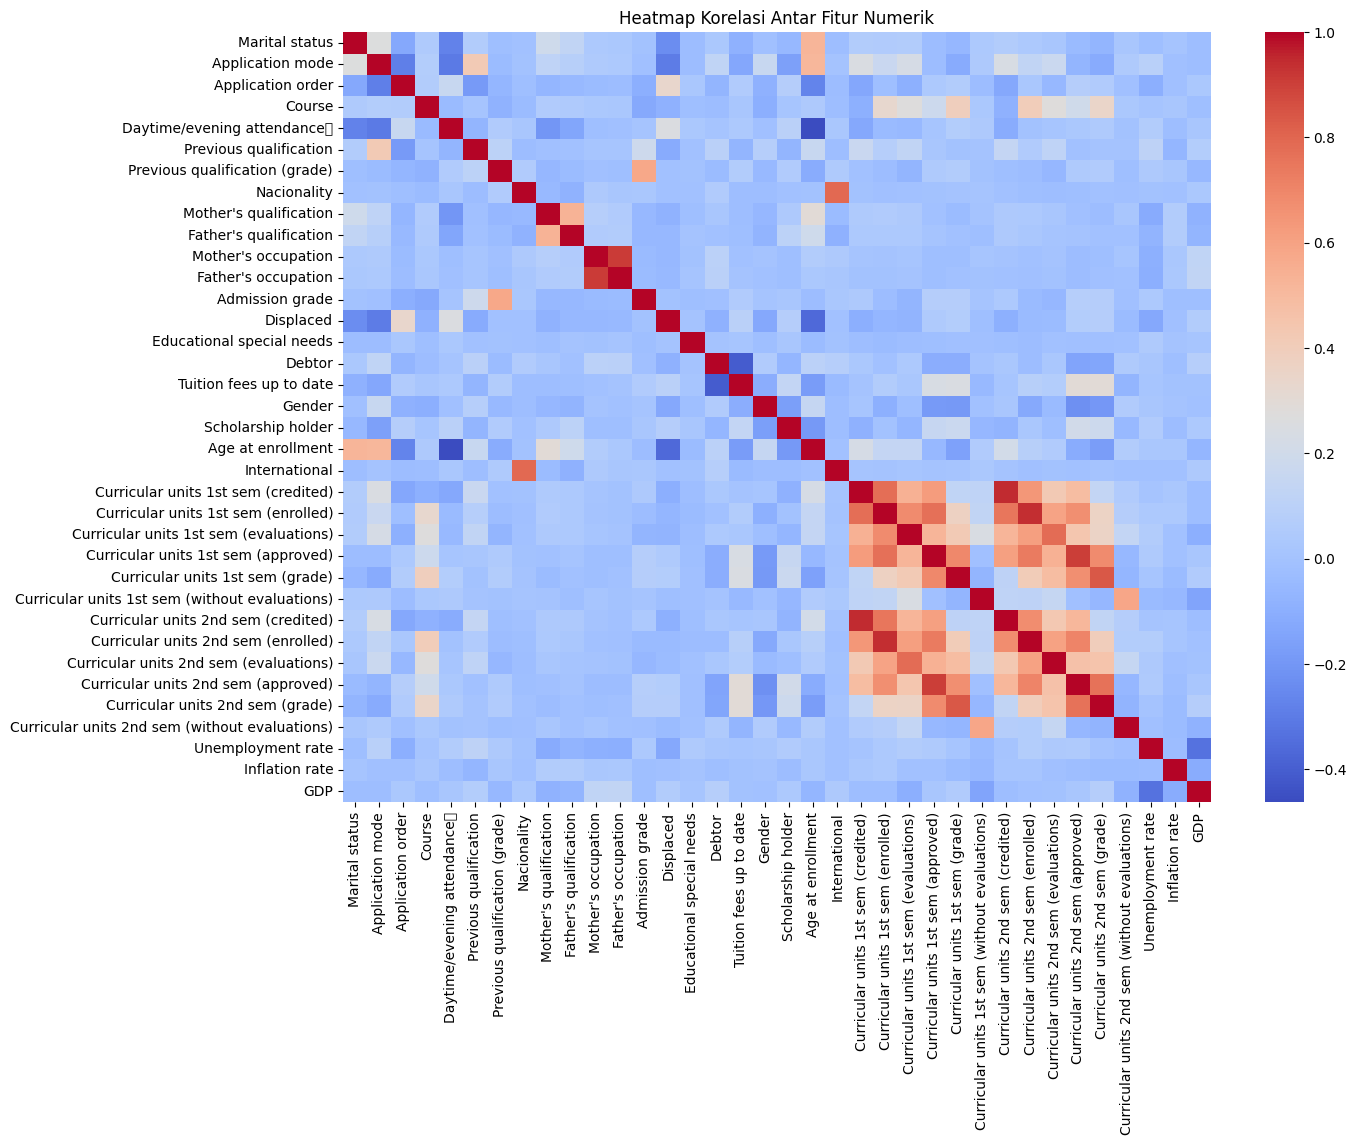

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

Gambar di atas merupakan heatmap korelasi antar fitur numerik.

## Data Preparation / Preprocessing

In [ ]:
main_df = df[['Debtor','Scholarship holder','Tuition fees up to date', 'Marital status', 'Application mode', 'Course', 'Admission grade', 'Curricular units 1st sem (approved)',
              'Curricular units 1st sem (grade)','Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)','Age at enrollment', 'Target']]

In [ ]:
label_encoder = LabelEncoder()
main_df["Target"] = label_encoder.fit_transform(main_df["Target"])

Mengubah data kategorikal pada kolom 'Target' menjadi data numerik.

In [ ]:
main_df.head()

,Debtor,Scholarship holder,Tuition fees up to date,Marital status,Application mode,Course,Admission grade,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Age at enrollment,Target
0,0,0,1,1,17,171,127.3,0,0.000000,0,0.000000,20,0
1,0,0,0,1,15,9254,142.5,6,14.000000,6,13.666667,19,2
2,0,0,0,1,1,9070,124.8,0,0.000000,0,0.000000,19,0
3,0,0,1,1,17,9773,119.6,6,13.428571,5,12.400000,20,2
4,0,0,1,2,39,8014,141.5,5,12.333333,6,13.000000,45,2


Menampilkan 5 baris pertama dari data yang telah dibaca dan disimpan dalam variabel df setelah kolom 'Target' diubah menjadi data numerik (Label Encoding).

In [ ]:
train_df, test_df = train_test_split(main_df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(3539, 13)
(885, 13)


Membagi data menjadi dua bagian: data latih (train_df) dan data uji (test_df) dengan perbandingan 80/20.

In [ ]:
X_train = main_df.drop(columns="Target", axis=1)
y_train = main_df["Target"]

X_test = test_df.drop(columns="Target", axis=1)
y_test = test_df["Target"]

Memisahkan fitur (X) dan target (y) dari data, baik untuk data latih (train) maupun data uji (test).

In [ ]:
def scaling(features, main_df, df_test=None):
    if df_test is not None:
        main_df = main_df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(main_df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            main_df["{}".format(feature)] = scaler.transform(X)

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return main_df, df_test
    else:
        main_df = main_df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(main_df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            main_df["{}".format(feature)] = scaler.transform(X)
        return main_df

Fitur scaling = untuk menskalakan nilai-nilai fitur numerik dalam DataFrame menggunakan teknik yang disebut MinMax Scaling.

In [ ]:
numerical_columns = [
    'Debtor','Scholarship holder','Tuition fees up to date', 'Marital status', 'Application mode', 'Course', 'Admission grade', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)','Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)','Age at enrollment'
]

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)

Menskalakan nilai-nilai pada kolom-kolom numerik di data latih (X_train) dan data uji (X_test).

In [ ]:
new_train_df.head()

,Debtor,Scholarship holder,Tuition fees up to date,Marital status,Application mode,Course,Admission grade,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Age at enrollment
0,0.0,0.0,1.0,0.0,0.285714,0.013858,0.340000,0.000000,0.000000,0.00,0.000000,0.056604
1,0.0,0.0,0.0,0.0,0.250000,0.925989,0.500000,0.230769,0.741722,0.30,0.735897,0.037736
2,0.0,0.0,0.0,0.0,0.000000,0.907512,0.313684,0.000000,0.000000,0.00,0.000000,0.037736
3,0.0,0.0,1.0,0.0,0.285714,0.978108,0.258947,0.230769,0.711447,0.25,0.667692,0.056604
4,0.0,0.0,1.0,0.2,0.678571,0.801466,0.489474,0.192308,0.653422,0.30,0.700000,0.528302


Menampilkan 5 baris pertama dari data yang telah dibaca dan disimpan dalam variabel new_train_df setelah data discalling menggunakan MinMaxScaller.

In [ ]:
new_test_df.head()

,Debtor,Scholarship holder,Tuition fees up to date,Marital status,Application mode,Course,Admission grade,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Age at enrollment
0,0.0,1.0,1.0,0.6,0.678571,0.913537,0.157895,0.000000,0.000000,0.05,0.538462,0.245283
1,0.0,0.0,1.0,0.0,0.285714,0.924382,0.261053,0.192308,0.613056,0.30,0.653846,0.018868
2,1.0,1.0,1.0,0.0,0.285714,0.986142,0.341053,0.269231,0.673605,0.35,0.661538,0.018868
3,0.0,0.0,1.0,0.0,0.285714,0.967765,0.213684,0.230769,0.734153,0.25,0.700000,0.037736
4,0.0,0.0,1.0,0.0,0.678571,0.950693,0.117895,0.000000,0.000000,0.00,0.000000,0.188679


Menampilkan 5 baris pertama dari data yang telah dibaca dan disimpan dalam variabel new_test_df setelah data discalling menggunakan MinMaxScaller.

## Modeling

In [ ]:
gboost = XGBClassifier()
gboost.fit(X_train,y_train)

gboost_acc=accuracy_score(y_test,gboost.predict(X_test))

Membuat dan melatih model menggunakan algoritma XGBoost untuk memprediksi target variabel dan kemudian mengevaluasi akurasinya.

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))

Membuat dan melatih model menggunakan algoritma KNN untuk memprediksi target variabel dan kemudian mengevaluasi akurasinya.

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_acc = accuracy_score(y_test, lr.predict(X_test))

Membuat dan melatih model menggunakan algoritma Logistic Regression untuk memprediksi target variabel dan kemudian mengevaluasi akurasinya.

## Evaluation

In [ ]:
models = pd.DataFrame({'Model': ['KNN', 'Logistic Regression', 'XGBoost'], 'Accuracy': [ knn_acc, lr_acc, gboost_acc]})

models.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
2,XGBoost,0.964972
0,KNN,0.757062
1,Logistic Regression,0.680226


Membandingkan akurasi dari tiga model yang berbeda, yaitu KNN, Logistic Regression, dan XGBoost. Kemudian, tabel tersebut diurutkan berdasarkan akurasi dari yang tertinggi ke terendah. Dari tabel di atas, model XGBoost memiliki nilai akurasi tertinggi, yaitu 0.998870.

In [ ]:
y_pred_gboost = gboost.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_lr = lr.predict(X_test)

Menggunakan model yang telah dilatih sebelumnya (gboost, knn, dan lr) untuk membuat prediksi pada data uji (X_test). Hasil prediksi masing-masing model disimpan dalam variabel y_pred_gboost, y_pred_knn, dan y_pred_lr.

### XGBoost

In [ ]:
report = classification_report(y_test, y_pred_gboost)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       316
           1       0.97      0.91      0.94       151
           2       0.94      1.00      0.97       418

    accuracy                           0.96       885
   macro avg       0.97      0.95      0.96       885
weighted avg       0.97      0.96      0.96       885



Berdasarkan classification report di atas, model XGBoost memiliki performa yang sangat baik dalam memprediksi status mahasiswa. Metrik evaluasinya menunjukkan akurasi (0.96) dan kemampuan generalisasi yang tinggi. Model hampir selalu membuat prediksi yang benar dan berhasil mengidentifikasi hampir semua data dalam setiap kelas.

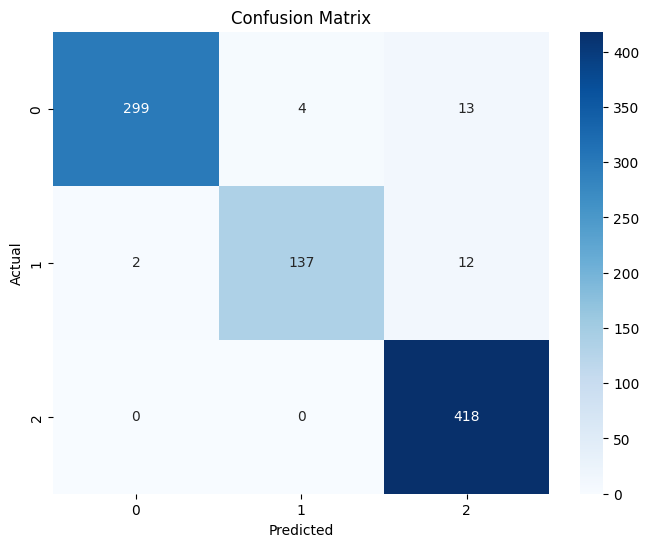

In [ ]:
cm = confusion_matrix(y_test, y_pred_gboost)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix dari model XGBoost mampu meprediksi data kelas 0 sebanyak 299 data, kelas 1 sebanyak 137 data dan kelas 2 sebanyak 418 data.

### KNN

In [ ]:
report = classification_report(y_test, y_pred_knn)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       316
           1       0.55      0.45      0.50       151
           2       0.78      0.90      0.84       418

    accuracy                           0.76       885
   macro avg       0.71      0.69      0.70       885
weighted avg       0.75      0.76      0.75       885



Berdasarkan classification report di atas, model KNN memiliki performa yang cukup baik. Model masih cukup akurat dalam memprediksi status "Dropout" dan "Graduate", tetapi kurang akurat dalam memprediksi status "Enrolled". Secara keseluruhan, akurasi model adalah 0.76, yang berarti model memprediksi dengan benar status mahasiswa untuk 0.76 data.

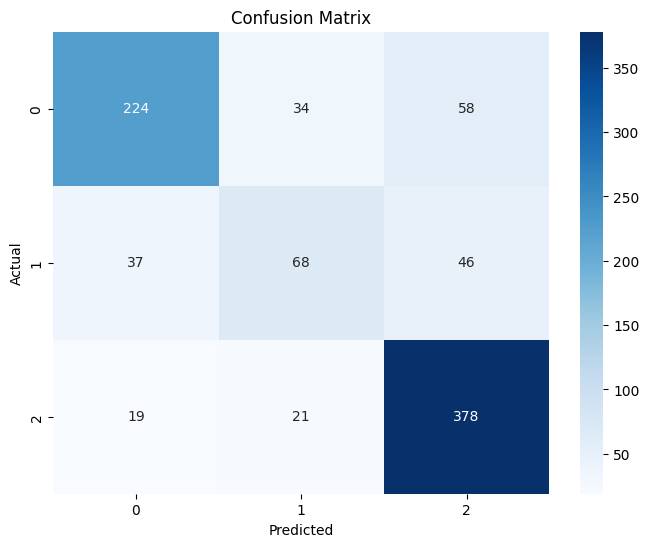

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix dari model KNN mampu meprediksi data kelas 0 sebanyak 224 data, kelas 1 sebanyak 68 data dan kelas 2 sebanyak 378 data.

### Logistic Regression

In [ ]:
report = classification_report(y_test, y_pred_lr)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       316
           1       0.38      0.03      0.06       151
           2       0.65      0.93      0.76       418

    accuracy                           0.68       885
   macro avg       0.60      0.54      0.51       885
weighted avg       0.64      0.68      0.62       885



Model Logistic Regression (LR) memiliki performa yang kurang baik, terutama dalam memprediksi kelas "Enrolled". Nilai recall dan F1-score yang sangat rendah untuk kelas 1 menunjukkan bahwa model kesulitan mengidentifikasi mahasiswa yang "Enrolled". Secara keseluruhan, akurasi model adalah 0.68, yang berarti model memprediksi dengan benar status mahasiswa untuk 0.68 data.

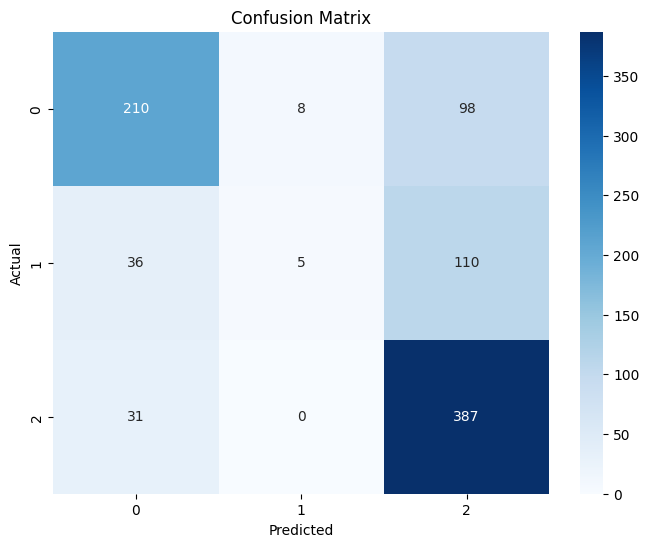

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix dari model Logistic Regression mampu meprediksi data kelas 0 sebanyak 210 data, kelas 1 sebanyak 5 data dan kelas 2 sebanyak 387 data.

### Save Model

Karena model XGBoost mendapatkan nilai akurasi tertinggi, jadi model XGBoost dipilih untuk pemodelan machine learning

In [ ]:
joblib.dump(gboost, "gboost.joblib")

['gboost.joblib']

Model XGBoost disimpan dengan formal .joblib